<a href="https://colab.research.google.com/github/Amogha-Maiya/k-means-cluster/blob/main/TASK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CLUSTERING!!
The method of identifying similar groups of data in a dataset is called clustering.
K-MEANS CLUSTERING  is a popular algorithm.In these models, the no. of clusters required at the end have to be mentioned beforehand,
 which makes it important to have prior knowledge of the dataset. These models run iteratively to find the local optima.
  These are iterative clustering algorithms in which the notion of similarity is derived by the closeness of a data point to the centroid of the clusters

CLUSTERING --> CENTROID MODEL --> K-MEANS CLUSTERING --> ELBOW METHOD  

basic idea behind partitioning methods, such as k-means clustering, is to define clusters such that the total intra-cluster variation
[or total within-cluster sum of square (WSS)] is minimized. The total WSS measures the compactness of the clustering and we want it to be as small as possible.
Compute clustering algorithm (e.g., k-means clustering) for different values of k. For instance, by varying k from 1 to 10 clusters.
For each k, calculate the total within-cluster sum of square (wss).
Plot the curve of wss according to the number of clusters k.
The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.

WE IMPORT AND LOAD THE DATA HERE


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

WE FIND THE NUMBER OF CLUSTERS(K) USING PLOTTING THE GRAPH THAT IS ELBOW METHOD!

WE PLOT THE GRAPH K VS WCSS TO GET THE ELBOW POINT
WCSS IS NOTHING BUT WITHIN CLUSTER SUM OF SQUARES THAT IS MINIMUM 
WHEN NO FURTHER CHANGE DATA POINT(JUMPING)IN CLUSTERING IS POSSIBLE.
K=3 GIVES THE NUMBER OF CLUSTERS NEEDED USING THE GRAPH.

.INERTIA GIVES THE WCSS, WE APPEND THE VALUES OF KMEANS TO WCSS

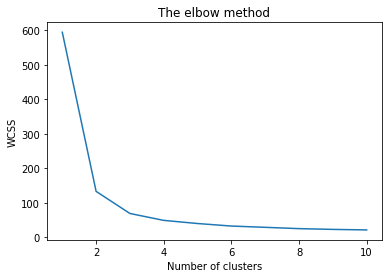

In [ ]:
x = iris_df.iloc[:,:-1].values

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as ** '3**'.

In [ ]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

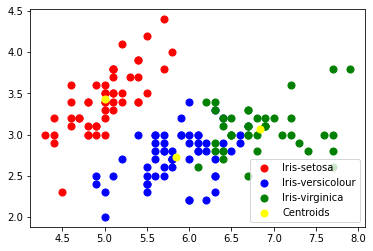

In [ ]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 50, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 50, c = 'yellow', label = 'Centroids')

plt.legend()